# Линейная алгебра. Лабораторная работа 1, осень 2019

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас я создам нулевую матрицу

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
np.diag([1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [7]:
np.trace(np.diag([1, 2, 3, 4, 5]))

15

In [10]:
np.linalg.inv(np.diag([1, 2, 3, 4, 5]))

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [33]:
X = np.random.rand(4, 5)
print(X)

[[0.1068367  0.77243085 0.86262396 0.83428127 0.48768773]
 [0.00422512 0.32961215 0.39066722 0.31607717 0.89098293]
 [0.49340675 0.2132797  0.18979066 0.00890051 0.84771292]
 [0.48049215 0.88532962 0.24606559 0.76949296 0.16951155]]


In [34]:
np.linalg.det(X[1:3,0:2])

-0.1617317276308481

In [35]:
np.dot(X.T, X)

array([[0.48575487, 0.61454419, 0.30568709, 0.46459422, 0.55558371],
       [0.61454419, 1.53459034, 1.05341366, 1.43176066, 1.00125739],
       [0.30568709, 1.05341366, 0.99330974, 1.03418697, 0.9713679 ],
       [0.46459422, 1.43176066, 1.03418697, 1.38812864, 0.82647112],
       [0.55558371, 1.00125739, 0.9713679 , 0.82647112, 1.77904126]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [2]:
def my_det(X):
    X = np.array(X.copy(), dtype=float)
    if X.shape[0] != X.shape[1]:
        return ValueError
    else:
        koef = 1
        for j in range(len(X)):
            i = j
            while i < len(X) and X[i][j] == 0:
                i += 1
            if i < len(X):
                if i != j: koef *= (-1)
                X[j], X[i] = X[i], X[j].copy()
                for i in range(j + 1, len(X)):
                    X[i] -= X[j] * (X[i][j]/X[j][j])
        det = koef * np.prod(np.diagonal(X))
    return det

Простая проверка:

In [3]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [4]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

8.96 µs ± 56.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
147 µs ± 399 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
66.7 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.5 ms ± 83.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.5 ms ± 720 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


C:\Users\Denis\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2 s ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


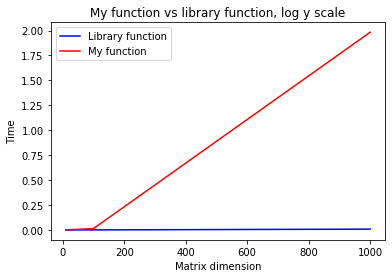

In [53]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

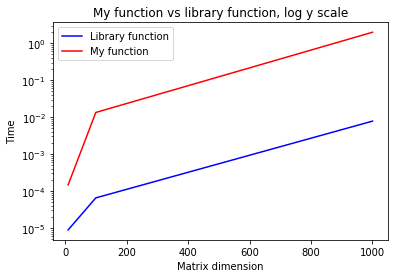

In [54]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [55]:
print(np.dot(np.array([[1, 0], [10**20, 1]]), np.array([[10**(-20), 1], [0, 1 - (10**20)]])))

[[1e-20 1]
 [1.0 1]]


In [56]:
print(np.dot(np.array([[1., 0.], [10.**20, 1.]]), np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])))

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ**

Получаем правильный ответ в первом случае, когда в правом нижнем углу стоит 1. В этом несложно убедиться, просто посчитав соответсвующее произведение. Остальные же элементы одинаковы (с точностью до ε)

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [57]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for i in range(dim):
        P[0][i] = 1
        P[i][0] = 1
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i - 1][j] + P[i][j - 1]
                               
    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Он равен 1. Это можно доказать индукцией по n. Для n = 1 всё верно. Пусть верно для n-1. Докажем для n. По определению числа сочетаний, (i, j) элемент нашей матрицы получен суммой (i, j-1) + (i - 1, j) элементов. Поскольку элем. операции 1 типа не меняют опеределитель, начиная с n столбца до 2 будем из текущего вычиать предыдущий(т.е. из i столбца вычитаем i-1, i = {2,3,...,n}). Теперь поработаем со строками. Начиная с n строки по 2 будет вычитать из текуще предыдущую (т.е. из i строки вычитаем i-1, i = {2,3,...,n}). После проведения всех этих операций получим матрицу, у которой на (0,0) позиции стоит 1, подн ней все 0, а справа - единицы. Оставшаяся же часть матрицы будет выглядеть как матрица паскаля размера n-1. Разложем наш определитель по 1 столбцу. Получим 1*det(A_(n-1)), где A_(n-1) - матрица паскаля размера n-1. Воспользовавшись предположением индукции получаем, что определитель матрицы паскаля равен 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [58]:
sla.det(my_pascal(30))

1.0299188904699096e+48

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [196]:
def prod_and_sq_sum(A):
    summ = sum(np.diagonal(A) * np.diagonal(A))
    prod = np.prod(np.diagonal(A))
    return (summ, prod)
#print(prod_and_sq_sum(2 * np.eye(3)))

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [199]:
#def cheker(A, B, k):
 #   sum = np.zeros((len(A), len(A)))
  #  for i in range(min(k, len(A))):
   #     sum += np.dot(A[:,i:i+1], B[:,i:i+1].T)
    #return sum
def f(A, B, k):
    return np.dot(A[0:len(A),0:min(len(A), k)], B[0:len(A), 0:min(len(A), k)].T)
#X = np.random.rand(5, 4)
#Y = np.random.rand(5, 4)
#print(X)
#print(Y)
#print(f(X, Y, 3))
#print(cheker(X, Y, 3))

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [112]:
def get_diag(A, B):
    return (A * B.T).sum(axis=1)
def cheker(A, B):
    return np.dot(A, B).diagonal()
X = np.random.rand(5, 5)
Y = np.random.rand(5, 5)
print(get_diag(X, Y))
print(cheker(X, Y))

[1.86849673 1.49202241 0.77859751 0.62684455 2.12397059]
[1.86849673 1.49202241 0.77859751 0.62684455 2.12397059]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [61]:
import math
def shrink_rotate(x, a, coef=1., angle=0.):
    vect = np.array([[(x.real - a.real )* coef], [(x.imag - a.imag) * coef]])
    rotate_mat = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
    ans = np.dot(rotate_mat, vect)
    return complex(ans[0][0], ans[1][0]) + a
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    vect = np.array([[(x.real - a.real )* coef], [(x.imag - a.imag) * coef]])
    rotate_mat = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
    ans = np.dot(rotate_mat, vect)
    return complex(ans[0][0], -ans[1][0]) + a
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    x_re = x.real
    x_im = x.imag
    a_re = a.real
    a_im = a.imag
    z_re = a_re + r * r * (x_re - a_re)/((x_re - a_re)**2 + (x_im - a_im)**2)
    z_im = a_im + r * r * (x_im - a_im)/((x_re - a_re)**2 + (x_im - a_im)**2)
    return complex(z_re, z_im)
    raise NotImplementedError()
y = complex(2, 1)
z = complex(1, 1)
print(shrink_rotate_conj(y, z, coef=2, angle=np.pi/2))

(1.0000000000000002-1j)


**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

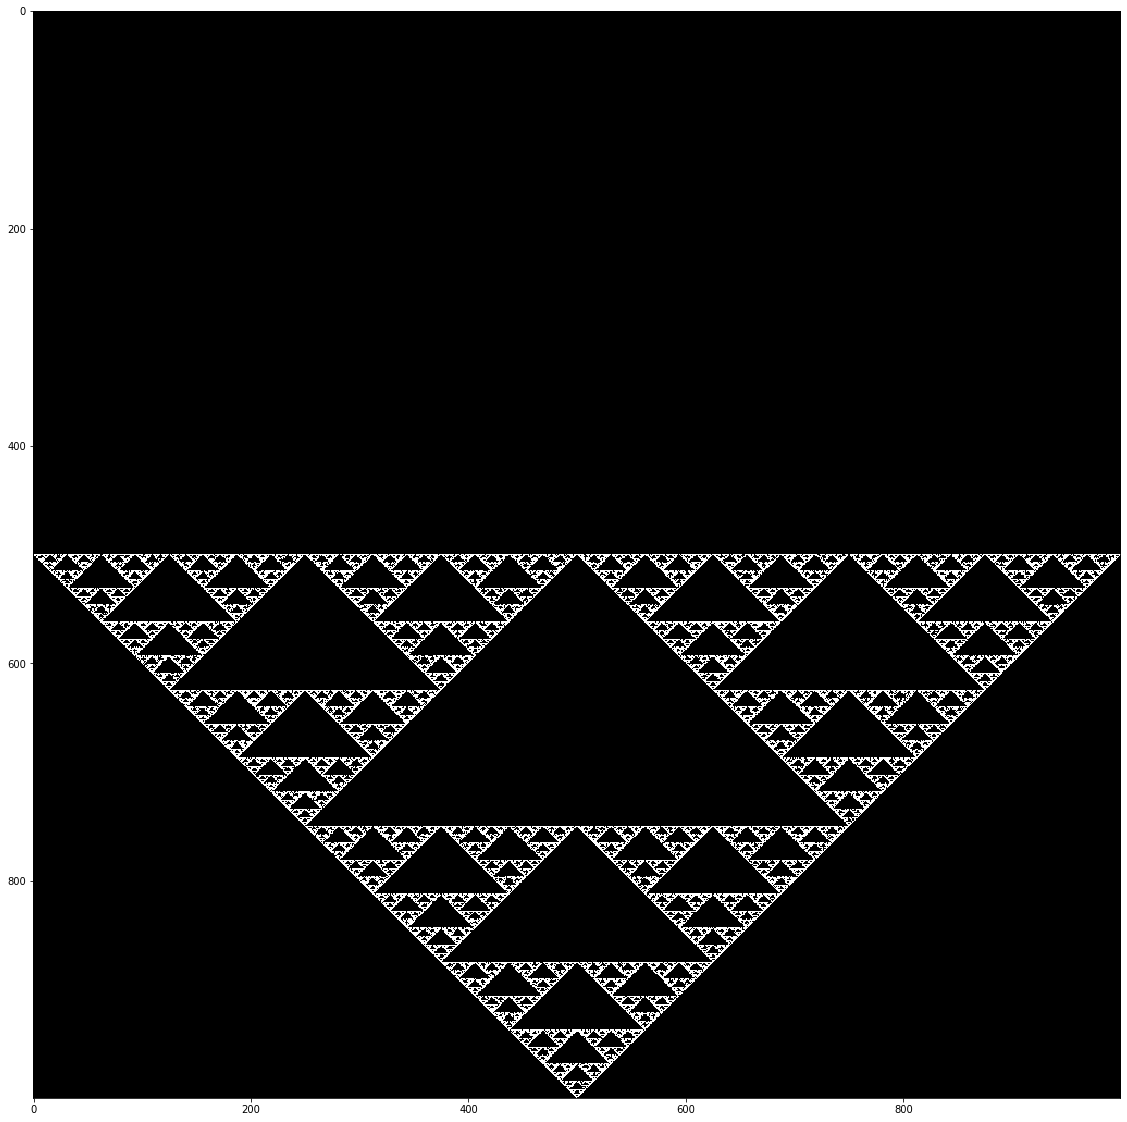

In [217]:
Mat = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        z_re = z.real * 500 + 500
        z_im = z.imag * 500 + 500
        if z_re < 1000 and z_im < 1000:
            Mat[int(z_im)][int(z_re)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(Mat, cmap='gray')
     

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

В углах нашего основного треугольника(самого большого) расположены точки (0,i),(1, 0*i),(-1, 0*i). Каждый раз мы откладывает наш вектор z от одной из этих точек, которую выбираем случайно. При этом каждый раз модуль нашего вектора уменьшается в 2 раза, отсюда получается то, что стороны каждого последующего вложенного треугольника в 2 раза меньше.

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

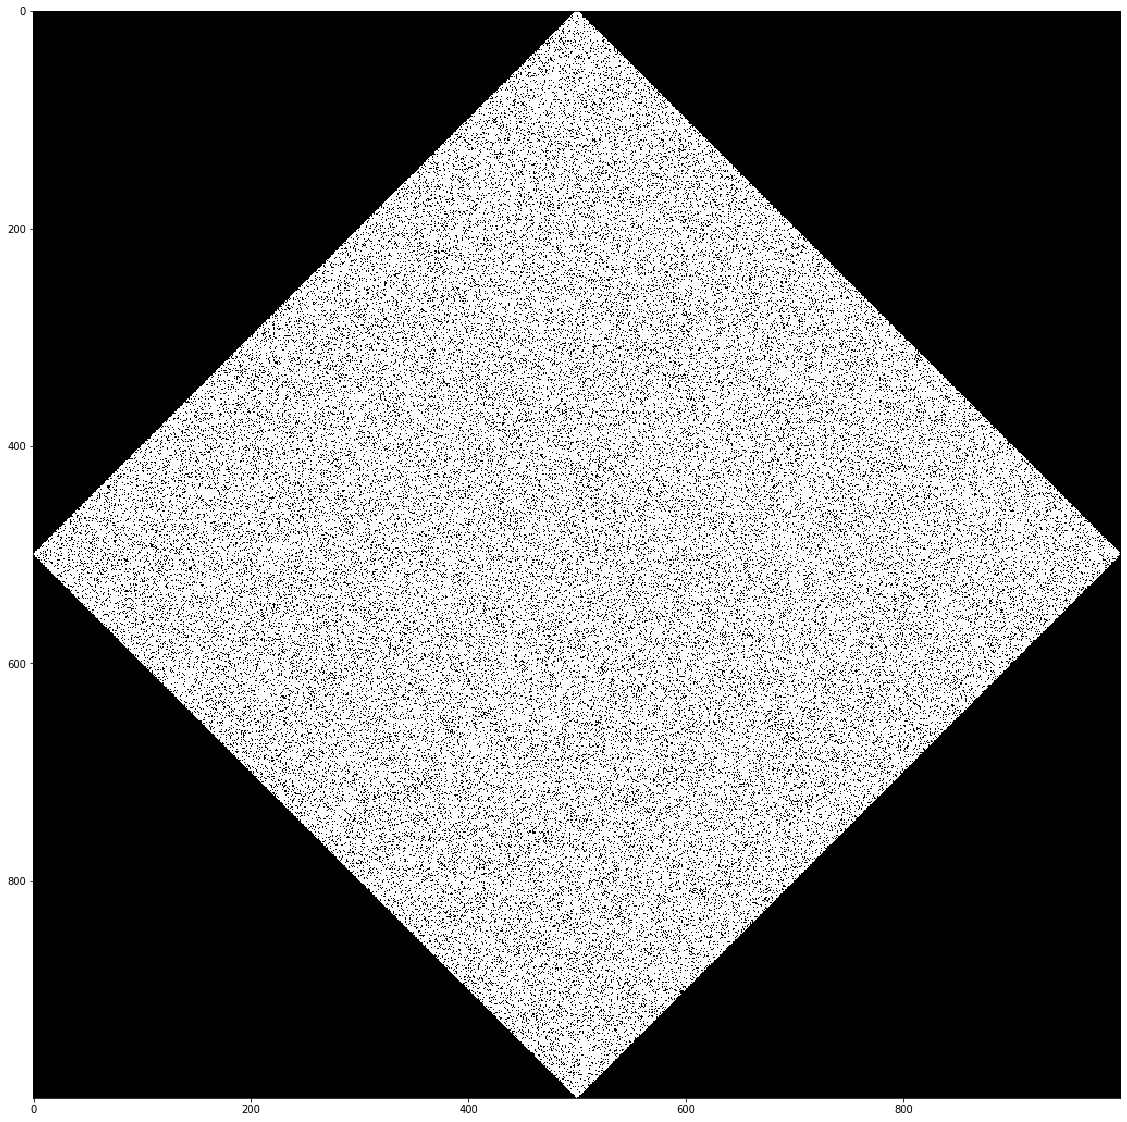

In [63]:
Mat = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 1000000
funcs = [
    (lambda t: shrink_rotate(t, 0. -1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        z_re = z.real * 500 + 500
        z_im = z.imag * 500 + 500
        if z_re < 1000 and z_im < 1000:
            Mat[int(z_im)][int(z_re)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(Mat, cmap='gray')
  

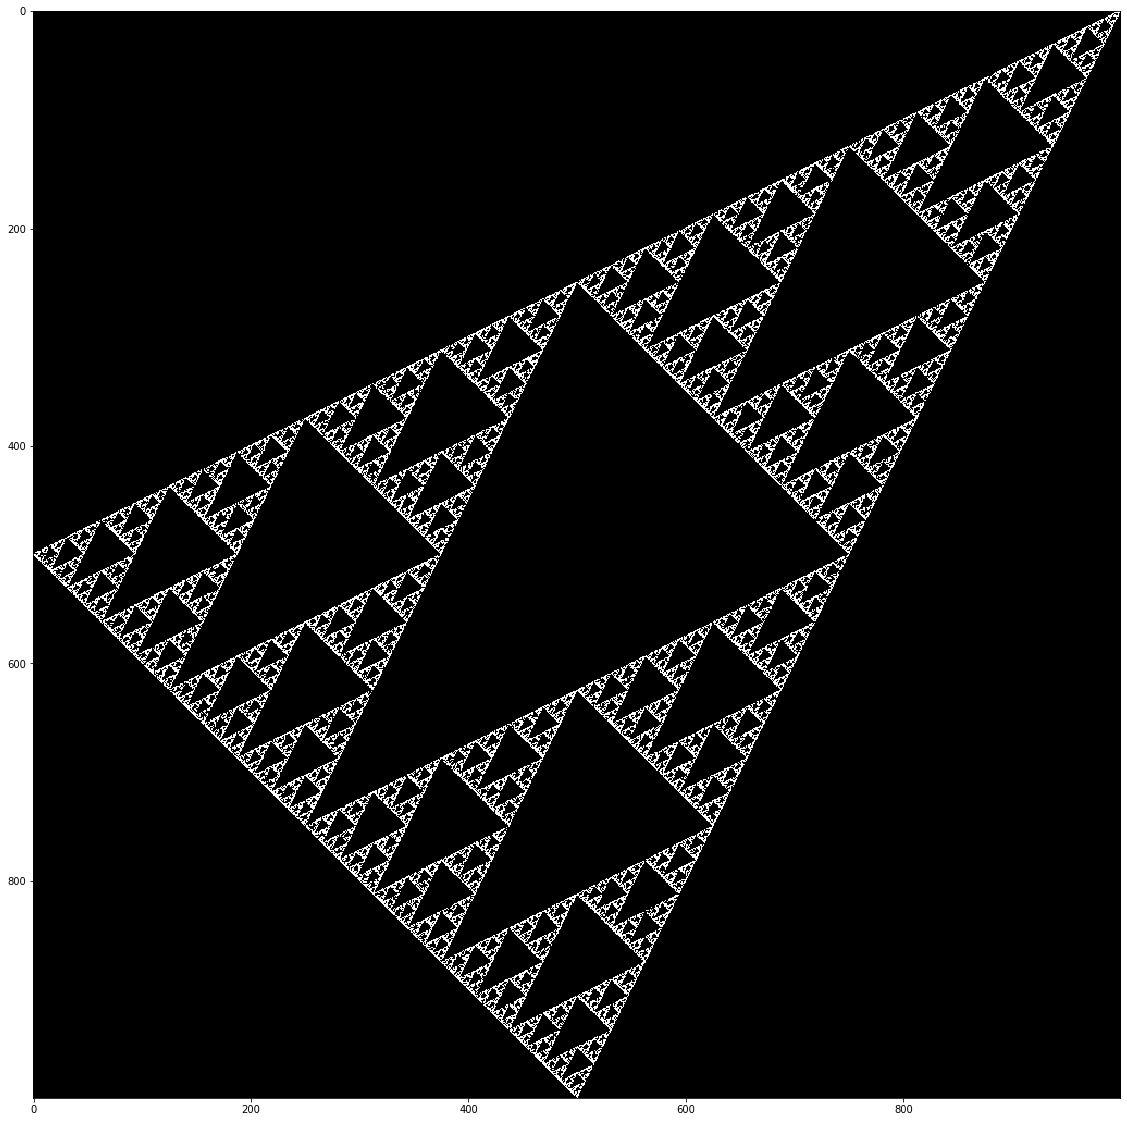

In [221]:
Mat = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + -1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        z_re = z.real * 500 + 500
        z_im = z.imag * 500 + 500
        if z_re < 1000 and z_im < 1000:
            Mat[int(z_im)][int(z_re)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(Mat, cmap='gray')
  

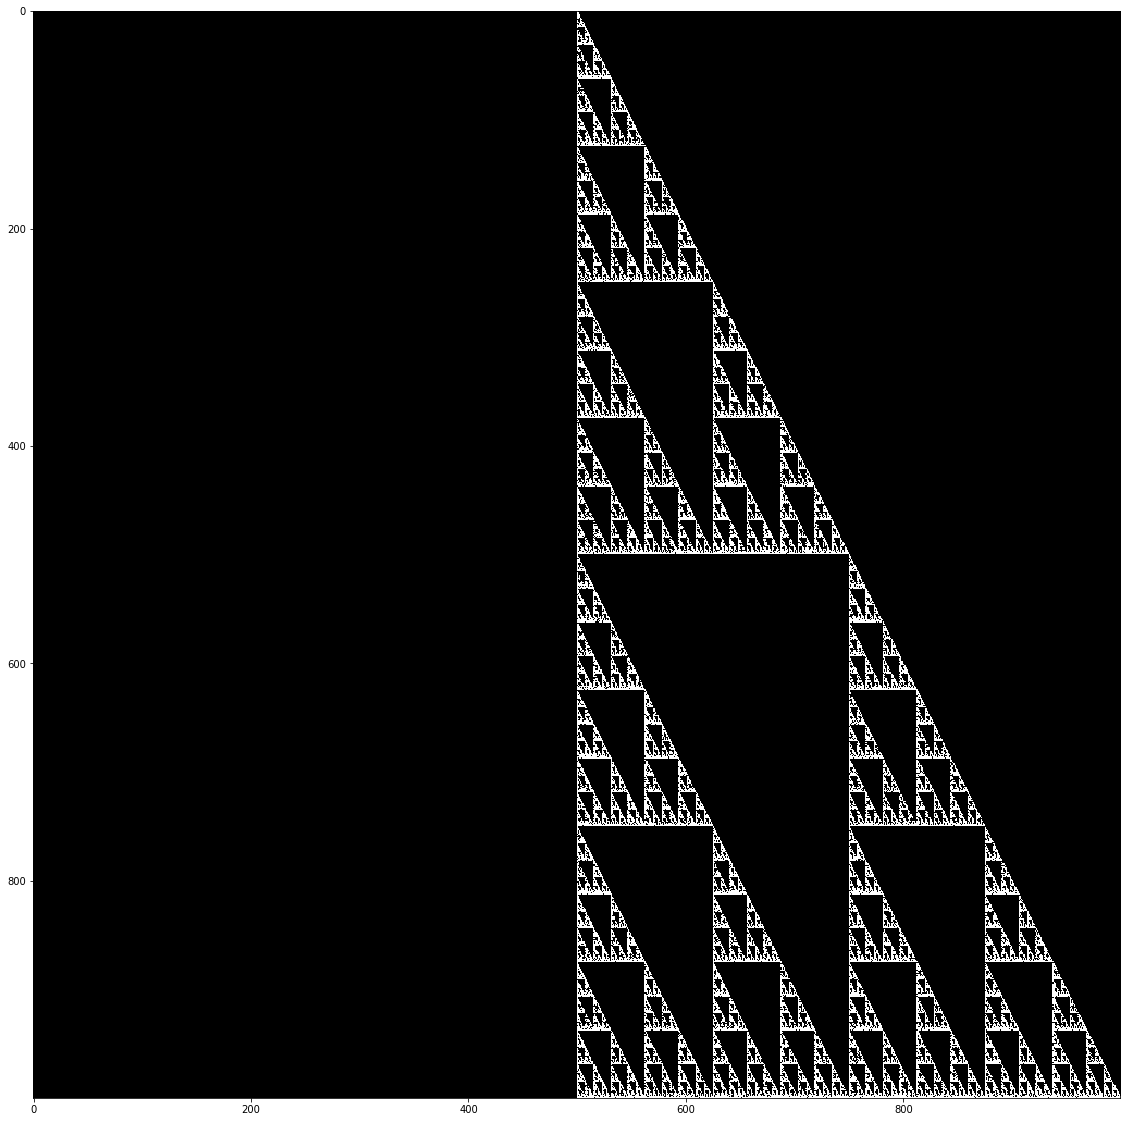

In [220]:
Mat = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + -1.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        z_re = z.real * 500 + 500
        z_im = z.imag * 500 + 500
        if z_re < 1000 and z_im < 1000:
            Mat[int(z_im)][int(z_re)] = 1
plt.figure(figsize=(20, 20))
plt.imshow(Mat, cmap='gray')
  

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

41.9 µs ± 671 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
38.7 µs ± 557 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
92.9 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
108 µs ± 774 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
163 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
214 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
424 µs ± 3.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
572 µs ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.58 ms ± 51.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.33 ms ± 81 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.9 ms ± 784 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


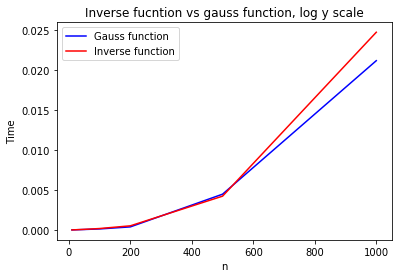

In [190]:
gauss_times = []
inv_times = []
n = [10, 50, 100, 200, 500, 1000]
for dim in n:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, 10)
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o np.dot(sla.inv(A), B)
    inv_times.append(res_inv.best)    

plt.plot(n, gauss_times, color='blue', label='Gauss function')
plt.plot(n, inv_times, color='red', label='Inverse function')
plt.title('Inverse fucntion vs gauss function, log y scale')
plt.ylabel('Time')
plt.xlabel('n')
plt.legend()

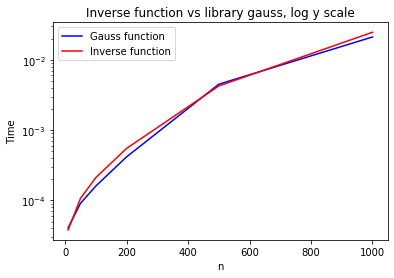

In [191]:
plt.semilogy(n, gauss_times, color='blue', label='Gauss function')
plt.semilogy(n, inv_times, color='red', label='Inverse function')
plt.title('Inverse function vs library gauss, log y scale')
plt.ylabel('Time')
plt.xlabel('n')
plt.legend()

189 µs ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
258 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
233 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
324 µs ± 38.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
412 µs ± 49.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
333 µs ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
631 µs ± 70.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
506 µs ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.09 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.59 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.55 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.51 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.22 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.46 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops e

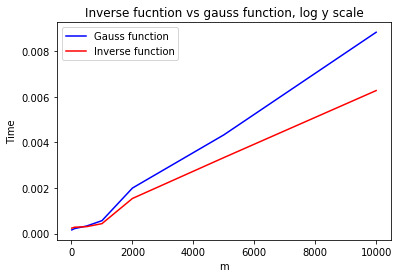

In [64]:
gauss_times = []
inv_times = []
m = [10, 100, 500, 1000, 2000, 5000, 10000]
for dim in m:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, dim)
    res_gauss = %timeit -o sla.solve(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o np.dot(sla.inv(A), B)
    inv_times.append(res_inv.best)    

plt.plot(m, gauss_times, color='blue', label='Gauss function')
plt.plot(m, inv_times, color='red', label='Inverse function')
plt.title('Inverse fucntion vs gauss function, log y scale')
plt.ylabel('Time')
plt.xlabel('m')
plt.legend()

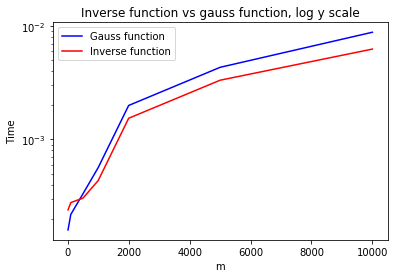

In [65]:
plt.semilogy(m, gauss_times, color='blue', label='Gauss function')
plt.semilogy(m, inv_times, color='red', label='Inverse function')
plt.title('Inverse function vs gauss function, log y scale')
plt.ylabel('Time')
plt.xlabel('m')
plt.legend()

Посчитаем ассимптотику при нахождении обратной матрицы:
Для начали нам нужнопривести A к ступенчатому виду параллельно с этим производя те же самые опперации с единичной матрицей. сложение строк бдуте занимать n + n, их нам нужно будет складывать(на самом деле вычитать) n-1, n-2, ..., 1 раз => n(n-1)/2. Это всё происходит, когда мы только i строку вычитаем из нижних. Нам нужно сделать так n раз. Значит пока всего имеем (n+n)*(n*(n-1))/2 = O(n^3) Теперь нам нужно привести нашу А к единичной, воспользовавшись обратным шагом Гаусса. Это также займёт O(n^3), т.к. делаем идентичное количество иттераций. Мы нашли А_1 - обратную матрицу к А, но, чтобы решить СЛУ нам необходимо A_1 умножить на B. Посчитаем количество иттераций тут: каждую строку (из n стро матрицы А) нам нужно умнодить на каждый столбей матрицы В(их всего m), при всём этом будет каждый раз произведено n-1 сложение и n умножений. Значит в сумме это зайёмт (n*m*(n+n-1)) = O(m*n^2) => в сумме будет 2*O(n^3) + O(m*n^2) = O(2*n^3 + m*n^2).

Теперь посчитаем ассимптотику при решении СЛУ методом Гаусса:
У нас есть расширенная матрица n*(n+m), которую нужно привести к улучшенному ступенчатому виду. Посчитаем кол-во иттераций для прямого хода Гаусса. Каждый раз у нас присутствует n+m умножений и m+n-1 сложений => всего 2(m + n) - 1.  При этом мы вычитаем строки сначал n-1 разб потом n-2, n-3, ... , 1 раз. Значит всего n(n-1)/2 => всего у нас уходит итераций (2(m + n) - 1)* (n(n-1)/2) = O((m + n)*n^2). Но теперь нам нужно привести систему к улучшенному ступенчатому виду. Причём на обратный ход гаусса нам потребуется ровно столько же иттераций. Значит всего будет нужно O(2((m+n)*n^2)).

Итог:
Как мы посчитали, у обоих методов одинаковая ассиптотика, что мы и можем видеть на обоих графиках, ведь они всё же очень близки. Однако при фиксированном m метод гаусса всё же работает немного быстрее, а при виксированном n, наоборот, нахождение обратной к А и умножение на В работает эффективнее. Могу предположить, что дело в том, как оптимизирован код в библиотеках, ведь наверняка, к примеру, sla.solve() решает СЛУ не просто методом гаусса, а делает это как-то эффективно. То же можно сказать и про нахождение обратной.